# Grafo Ponderado

In [1]:
# Instalando módulos necessários
!pip install networkx pandas matplotlib

In [2]:
# Importando Bibliotecas necessárias
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Lendo as informações das arestas e dos vértices
edgelist = pd.read_csv('estadios.csv')
nodelist = pd.read_csv('local.csv')

In [4]:
# Criando o grafo
g = nx.DiGraph()

In [5]:
# Adicionando Arestas
for i, elrow in edgelist.iterrows():
    g.add_edge(elrow[0], elrow[1], weight=elrow[2])

In [6]:
# Adicionando Posicionamento para os nós
for i, nlrow in nodelist.iterrows():
    g.node[nlrow['id']].update(nlrow[1:].to_dict())

In [7]:
# Posicionamento para o plot
node_positions = {node[0]: (node[1]['X'], -node[1]['Y']) for node in g.nodes(data=True)}

In [8]:
# Pesos para as arestas
#edge_labels = [{e[2]['attr_dict']['distance'] for e in g.edges(data=True)}]

edge_labels = nx.get_edge_attributes(g,'weight')
edge_labels

{('mangueirao', 'tuna'): 2,
 ('tuna', 'baenao'): 2,
 ('tuna', 'curuzu'): 2,
 ('tuna', 'mangueirao'): 2,
 ('baenao', 'curuzu'): 1,
 ('baenao', 'tuna'): 2,
 ('curuzu', 'tuna'): 2,
 ('curuzu', 'baenao'): 2}

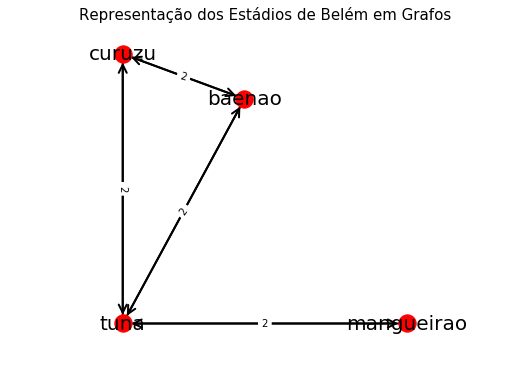

In [9]:
# Plotando o grafo
plt.figure(figsize=(8, 6))

# nós
nx.draw_networkx_nodes(g, node_positions, node_size=300)
# Arestas
nx.draw_networkx_edges(g, node_positions, edgelist=edge_labels, width=2, arrowstyle='->', arrowsize=20)
# Legendas Nós
nx.draw_networkx_labels(g, node_positions, font_size=20, font_family='sans-serif')
# Legendas Arestas
nx.draw_networkx_edge_labels(g, node_positions, edge_labels=edge_labels)

plt.title('Representação dos Estádios de Belém em Grafos', size=15)
plt.xlim(-100,1000)
plt.axis('off')
plt.show()

## Resolução Lista de Exercícios 1

### 1 - Verificar a existência de uma determinada aresta

In [10]:
def isNode(g, node_name):
    print(g.has_node(node_name))
isNode(g, 'tuna')

True


### 2 - Informar o grau de um dado vértice

In [11]:
def nodeDegree(g, node_name):
    print(g.degree(node_name))
nodeDegree(g, 'tuna')

6


### 3 - Informar a lista de adjacência de um dado vértice

In [12]:
def adjList(g, node_name):
    for i in nx.neighbors(g, node_name):
        print(i)
adjList(g, 'mangueirao')

tuna


### 4 - Verificar se o grafo é cíclico

In [13]:
def hasCycle(g):
    for i in nx.simple_cycles(g):
        print(i)
hasCycle(g)

['tuna', 'mangueirao']
['tuna', 'curuzu', 'baenao']
['tuna', 'curuzu']
['tuna', 'baenao']
['tuna', 'baenao', 'curuzu']
['curuzu', 'baenao']


### 5 - Verificar se o grafo é conexo

In [14]:
def isConnected(g):
    print(nx.is_strongly_connected(g))
isConnected(g)

True


### 6 - Informar quantos e quais são os componentes fortemente conexos do grafo

### 7 - Verificar se o grafo é euleriano

In [15]:
def isEulerian(g):
    print(nx.is_eulerian(g))
isEulerian(g)

True


### 8 - Encontrar o caminho mais curto entre dois vértices